In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:97% !important; }</style>"))

import networkx as nx
import random
import matplotlib.pyplot as plt
import sys
import os
import json
import numpy as np
import pandas as pd
import glob
import seaborn as sns

/var/folders/dc/ckm_vfws7gj46c116ltm28k00000gn/T/ipykernel_78666/3255959764.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# Plot Results

In [4]:
def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False
    
densities = []
relations = []
bonferronies = []
df = pd.DataFrame(columns=['node_number', 'num_neighbours', 'weight_ratio', 'node_number_ratio', 'Graph type', 'power',
                           'probability_S_in_G1', 'p_value_G1', 'p_value_G2', 'optimal_bs_1', 'optimal_bs_1', 'p_bonferroni'])
bonf_files = glob.glob('data/synthetic_experimnts_output/*.json')
for ind, js_fn in enumerate(bonf_files):
    js = json.load(open(js_fn))
    df.loc[ind, :] = list(map(lambda x: float(x) if is_float(x) else x, js_fn.rstrip('.json').split(os.path.sep)[-1].split('_')[-5:])) + \
    [js['power'], js['probability_S_in_G1'], js['p_value_G1'], js['p_value_G2'], js['optimal_bs_1'], 
     js['optimal_bs_2'], js['p_bonferroni']]

df = df.sort_values(by=['node_number', 'num_neighbours', 'weight_ratio', 'node_number_ratio', 'p_bonferroni'])
df.loc[:, 'node_number'] = df['node_number'].astype(int)
df.loc[:, 'Significant'] = df['p_bonferroni'] < 0.05
df.loc[:, 's_nodes'] = df['node_number_ratio'] * df['node_number']
df

,node_number,num_neighbours,weight_ratio,node_number_ratio,Graph type,power,probability_S_in_G1,p_value_G1,p_value_G2,optimal_bs_1,optimal_bs_1,p_bonferroni,Significant,s_nodes
604,100,5.0,1.0,0.05,clique,21.931569,0.0,0.0004,0.0004,TTT,TTT,1599.681051,False,5.0
460,100,5.0,1.0,0.05,path,33.219281,0.0,1,1,T,T,10000000000.000008,False,5.0
571,100,5.0,1.0,0.1,clique,21.287712,0.0,0.0,0.0,TTTTTTTTT,TTTTTTTTT,0.0,True,10.0
68,100,5.0,1.0,0.1,path,57.15085,0.0,0.0016,0.0016,TT00T,TT00T,255948968081196.34375,False,10.0
416,100,5.0,1.1,0.05,clique,16.287712,0.000013,0.000008,0.000008,TTTT,TTTT,0.639809,False,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,10000,25.0,1.9,0.01,path,1291.908101,0.0,0.0,0.0,TTTT,TTTT,inf,False,100.0
569,10000,25.0,2.0,0.005,clique,62.287712,0.0,0.0,0.0,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,0.0,True,50.0
72,10000,25.0,2.0,0.005,path,616.234769,0.0,0.0,0.0,TTTT0T,TTTT0T,1023893196188389382087797932835835348154171324...,False,50.0
348,10000,25.0,2.0,0.01,clique,124.575425,0.0,0,0,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTT...,0.0,True,100.0


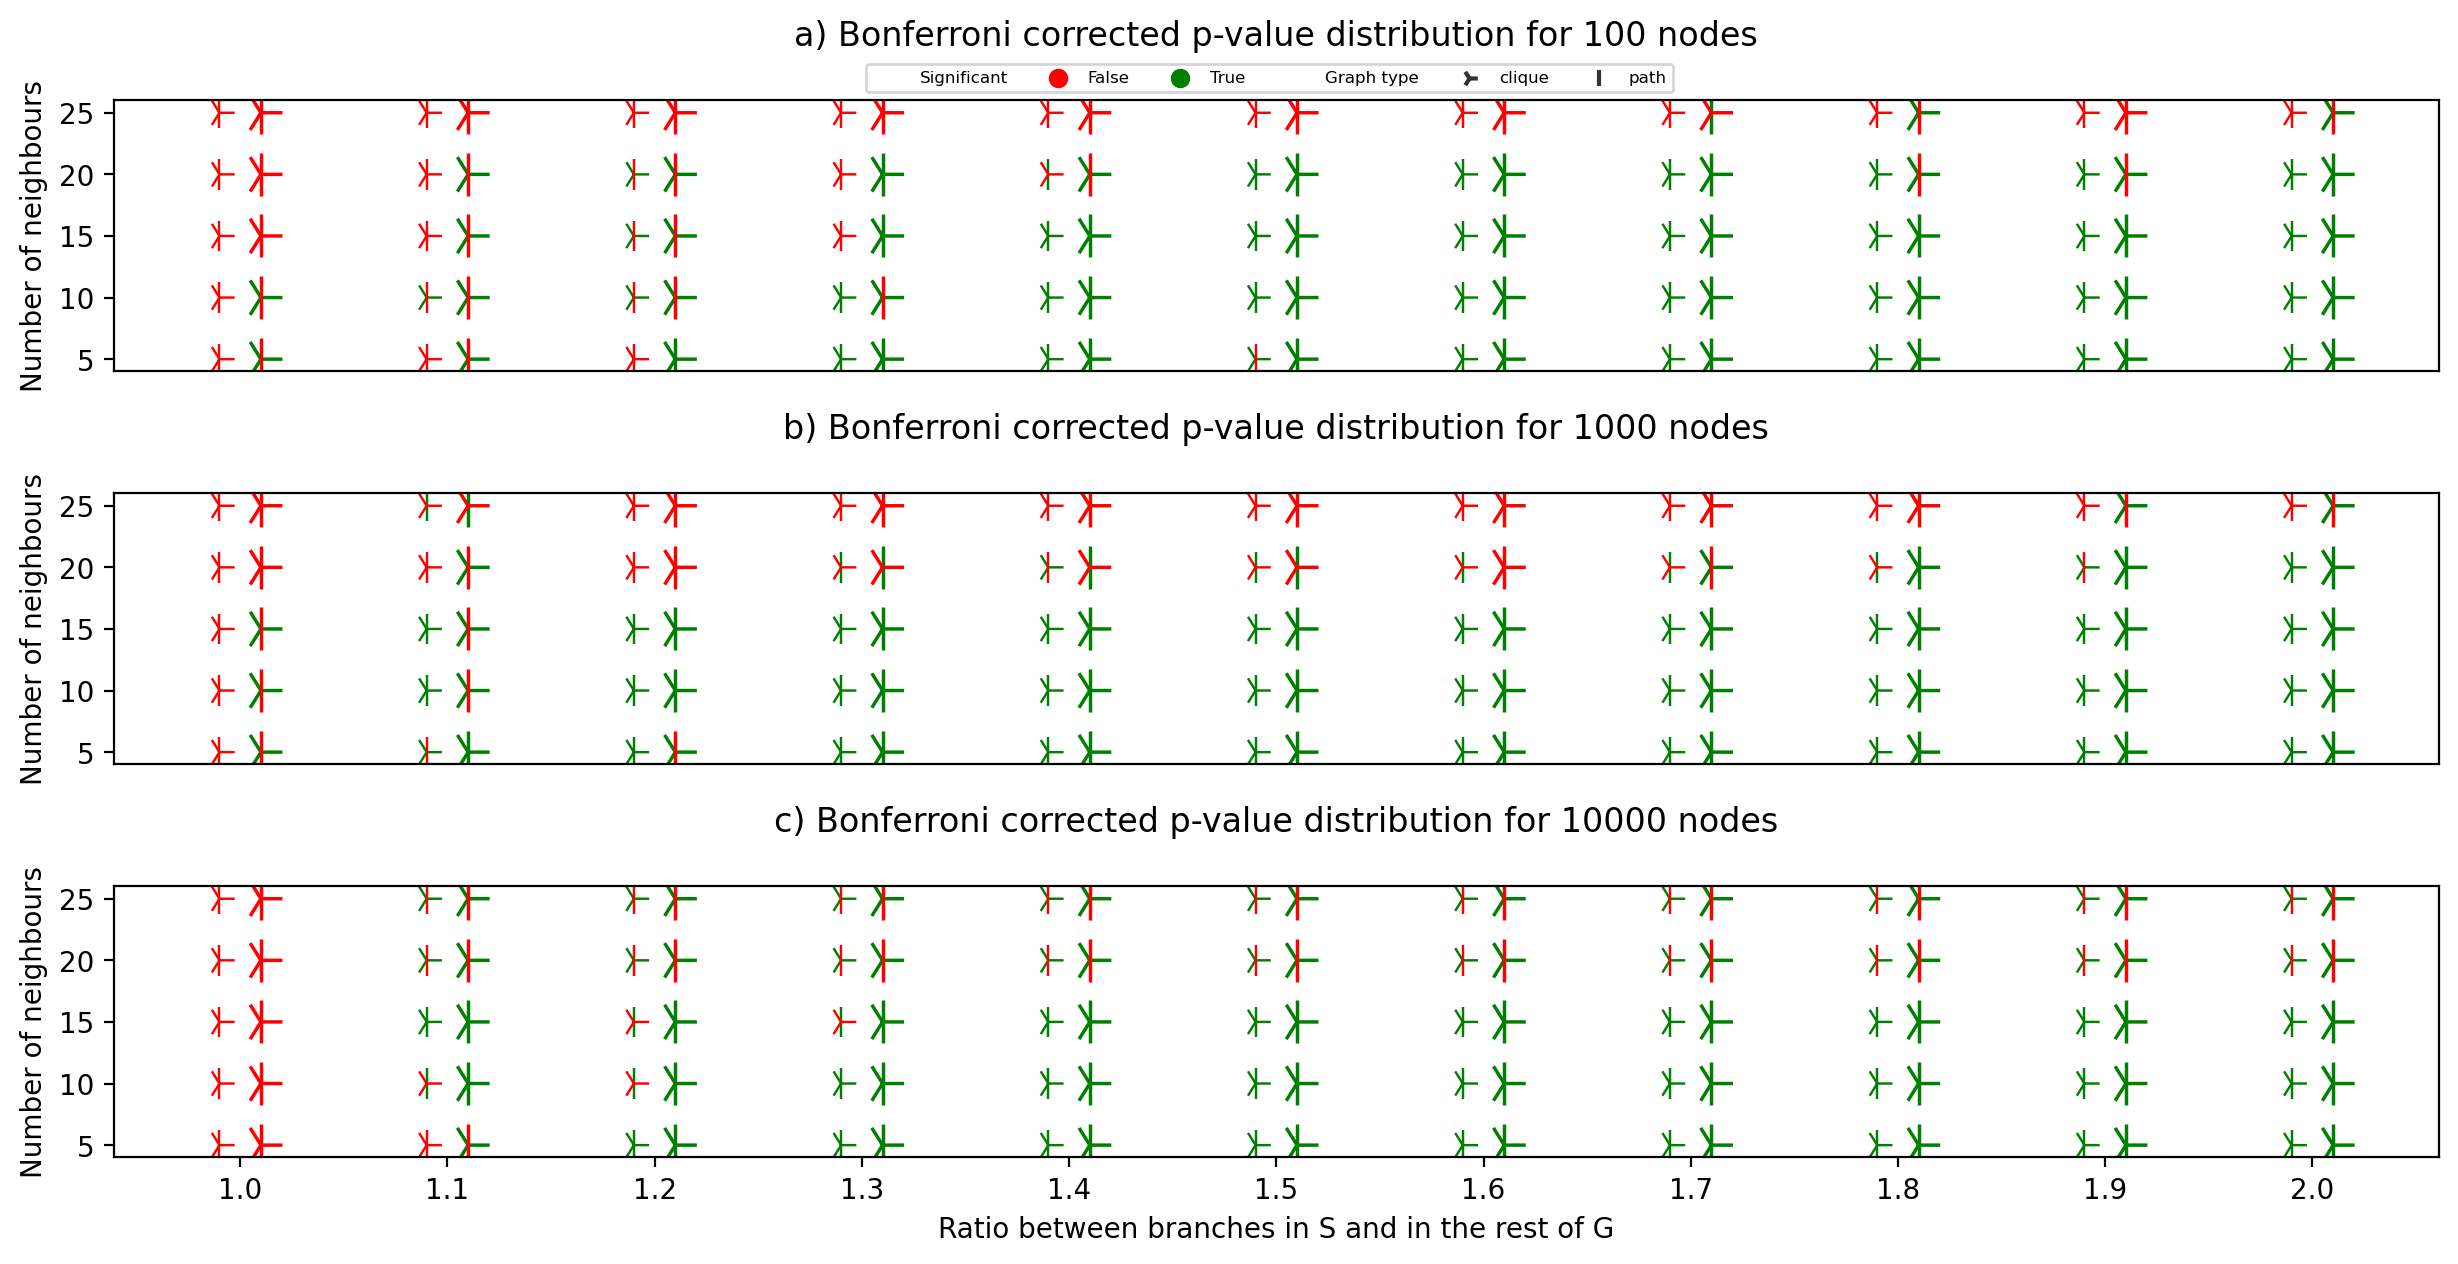

In [126]:
pd.options.mode.chained_assignment = None  # default='warn'
fig, ax = plt.subplots(3, figsize=(15,7), dpi=200)
fig.subplots_adjust(hspace=0.45)
for subpl, node_number, sec in zip([0, 1, 2], [100, 1000, 10000], ['a', 'b', 'c']):
    df_sel = df[df['node_number'] == node_number]
    
    markers = {"path": '|', "clique": '4'}
    df_sel.loc[:, 'weight_ratio'] = df_sel.loc[:, 'weight_ratio'].add(- 0.01)
    s_num = 5. if node_number < 10000 else 50.
    sns.scatterplot(data=df_sel[df_sel['s_nodes'] == s_num], x='weight_ratio', y='num_neighbours', size='s_nodes', hue='Significant', 
                    palette=['r', 'g'], style='Graph type', markers=markers, sizes=(120,150), ax=ax[subpl])
    s_num = 10. if node_number < 10000 else 100.
    df_sel.loc[:, 'weight_ratio'] = df_sel.loc[:, 'weight_ratio'].add(0.02)
    sns.scatterplot(data=df_sel[df_sel['s_nodes'] == s_num], x='weight_ratio', y='num_neighbours', size='s_nodes', hue='Significant', 
                    palette=['r', 'g'], style='Graph type', markers=markers, sizes=(240,300), ax=ax[subpl])

    ax[subpl].set_yticks([5, 10, 15, 20, 25])
    ax[subpl].set_ylabel('Number of neighbours')
    
    if subpl == 2:
        ax[subpl].set_xlabel('Ratio between branches in S and in the rest of G')
        ax[subpl].set_xticks([1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2])
        
    else:
        ax[subpl].set_xlabel(None)
        ax[subpl].set_xticks([])
        
        
    ax[subpl].set_title('{}) Bonferroni corrected p-value distribution for {} nodes\n'.format(sec, node_number))
    if subpl == 0:
        handles, labels = ax[subpl].get_legend_handles_labels()
        handles = handles[:3] + handles[5:8]
        labels = labels[:3] + labels[5:8]
        ax[subpl].legend(handles, labels, bbox_to_anchor=(0.32, 1.), ncol = 6, fontsize=6)
    else:
        ax[subpl].get_legend().remove()


plt.savefig(f'bonferroni_abc.png', bbox_inches='tight')
plt.show()

# Draw graph

In [63]:
np.append(s_nodes, 26)

array([935, 382, 368, 420, 839, 555, 144,   1, 944,  54,  26])

In [64]:
gpath = 'debug_CTD2/G2_1000_0.1_2.0_0.01_path.csv'
g1_df = pd.read_csv(gpath)
spath = 'debug_CTD2/S_1000_0.1_2.0_0.01_path.csv'
s_df = pd.read_csv(spath)
s_nodes = s_df.values.flatten()
g1 = nx.from_numpy_matrix(g1_df.values)
s_subgraph = g1.subgraph(np.append(s_nodes, 26))

In [65]:
s_and_neigh = []
for edge in g1.edges():
    if (edge[0] == 54) or (edge[1] ==54):# or (edge[0] in s_nodes and edge[1] in s_nodes):
        s_and_neigh.append(edge[0])
        s_and_neigh.append(edge[1])
s_and_neigh = list(set(s_and_neigh))
s_and_neigh_subgraph = g1.subgraph(s_and_neigh)

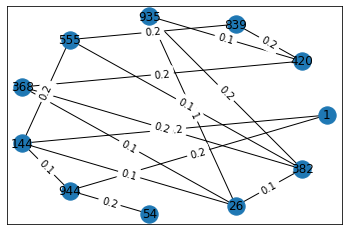

In [68]:
edge_weights = nx.get_edge_attributes(s_subgraph,'weight')

pos=nx.circular_layout(s_subgraph)
nx.draw_networkx(s_subgraph, pos=pos)
# nx.draw_networkx(s_subgraph, pos=pos, node_color = 'red', edge_color = 'red')
nx.draw_networkx_edge_labels(s_subgraph, pos, edge_labels = edge_weights, label_pos=0.5)
plt.show()

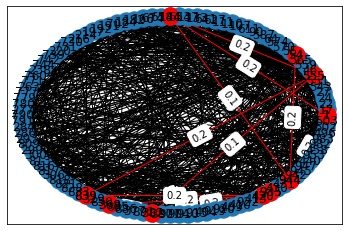

In [42]:
edge_weights = nx.get_edge_attributes(s_subgraph,'weight')

pos=nx.circular_layout(s_and_neigh_subgraph)
nx.draw_networkx(s_and_neigh_subgraph, pos=pos)
nx.draw_networkx(s_subgraph, pos=pos, node_color = 'red', edge_color = 'red')
nx.draw_networkx_edge_labels(s_and_neigh_subgraph, pos, edge_labels = edge_weights)
plt.show()

# pos=nx.circular_layout(G2)
# nx.draw_networkx(G2, pos=pos)
# nx.draw_networkx(nx.induced_subgraph(G2, S), pos=pos, node_color = 'blue', edge_color = 'green')
# #nx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_weights)
# plt.show()